In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('Data\Phan_lop.csv', index_col = None)

In [3]:
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,Class
0,-2.403589,-0.218339,-3.015506,2.187585,-1.415101,-0.000049,2.920957,-4.165317,-2.237563,1.567810,4.056278,-5.816942,3
1,-0.922966,6.564721,8.542600,-3.676891,1.526910,-6.132242,-1.284702,-7.841047,10.161966,-1.933277,8.959247,-2.492584,4
2,9.381326,-0.157043,9.674137,4.059390,9.150245,-8.320246,10.076978,-11.596349,-2.900057,-1.890156,0.390029,-5.383296,0
3,-7.610665,-10.375051,0.398027,-6.178855,5.848558,2.276540,-1.726164,9.378226,1.146725,-9.630693,-8.620247,-0.552103,2
4,8.586239,-4.265564,4.788978,4.309953,2.938052,-4.294121,6.980088,-9.878268,-5.017204,0.154492,7.647917,-1.004416,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
f1       1000 non-null float64
f2       1000 non-null float64
f3       1000 non-null float64
f4       1000 non-null float64
f5       1000 non-null float64
f6       1000 non-null float64
f7       1000 non-null float64
f8       1000 non-null float64
f9       1000 non-null float64
f10      1000 non-null float64
f11      1000 non-null float64
f12      1000 non-null float64
Class    1000 non-null int64
dtypes: float64(12), int64(1)
memory usage: 101.6 KB


In [5]:
data.shape

(1000, 13)

In [6]:
X = data[['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12']]
X.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
0,-2.403589,-0.218339,-3.015506,2.187585,-1.415101,-0.000049,2.920957,-4.165317,-2.237563,1.567810,4.056278,-5.816942
1,-0.922966,6.564721,8.542600,-3.676891,1.526910,-6.132242,-1.284702,-7.841047,10.161966,-1.933277,8.959247,-2.492584
2,9.381326,-0.157043,9.674137,4.059390,9.150245,-8.320246,10.076978,-11.596349,-2.900057,-1.890156,0.390029,-5.383296
3,-7.610665,-10.375051,0.398027,-6.178855,5.848558,2.276540,-1.726164,9.378226,1.146725,-9.630693,-8.620247,-0.552103
4,8.586239,-4.265564,4.788978,4.309953,2.938052,-4.294121,6.980088,-9.878268,-5.017204,0.154492,7.647917,-1.004416


1.1) Áp dụng phương pháp PCA để giảm chiều dữ liệu

In [36]:
pca = PCA(.9)

In [37]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
# Số chiều sau khi giảm
print(pca.n_components_)

5


In [39]:
# tỉ lệ phương sai được giữ lại
pca.explained_variance_ratio_

array([0.36812308, 0.28414549, 0.14599145, 0.08918693, 0.04557636])

In [40]:
print(sum(pca.explained_variance_ratio_))

0.9330233130887621


In [41]:
B = pca.transform(X)
print(B[0:5])

[[ -0.68924659  -1.06885009  -2.14483586  -7.03902333   7.5439572 ]
 [ -4.74083618  -3.44303139  -9.13467586  12.45344731   6.506586  ]
 [-16.81542157  -8.4921817   -5.19784764  -2.81250602  -7.62966037]
 [ -3.68358611  24.98158927   2.32107578  -3.01596388   0.50161857]
 [ -9.03347151  -9.44750599  -0.53472217  -3.6837844   -5.05315701]]


Nhận xét: Ta đã yêu cầu scikit-learn chọn số lượng thành phần chính tối thiểu sao cho ít nhất 90% của phương sai (thông tin) được giữ lại. Do đó, dữ liệu gốc đã giảm xuống còn 5 chiều.

1.3) Giảm chiều xuống còn k=2

In [42]:
pca1 = PCA(2)
pca1.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [43]:
B1 = pca1.transform(X)
print(B1[0:5])

[[ -0.68924659  -1.06885009]
 [ -4.74083618  -3.44303139]
 [-16.81542157  -8.4921817 ]
 [ -3.68358611  24.98158927]
 [ -9.03347151  -9.44750599]]


In [48]:
# tỉ lệ phương sai được giữ lại
pca.explained_variance_ratio_

array([0.36812308, 0.28414549, 0.14599145, 0.08918693, 0.04557636])

In [44]:
print(sum(pca1.explained_variance_ratio_))

0.6522685692035568


In [45]:
principalDf = pd.DataFrame(data = B1,
                           columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-0.689247,-1.068850
1,-4.740836,-3.443031
2,-16.815422,-8.492182
3,-3.683586,24.981589
4,-9.033472,-9.447506


In [46]:
finalDf = pd.concat([principalDf, data[['Class']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Class
0,-0.689247,-1.068850,3
1,-4.740836,-3.443031,4
2,-16.815422,-8.492182,0
3,-3.683586,24.981589,2
4,-9.033472,-9.447506,0


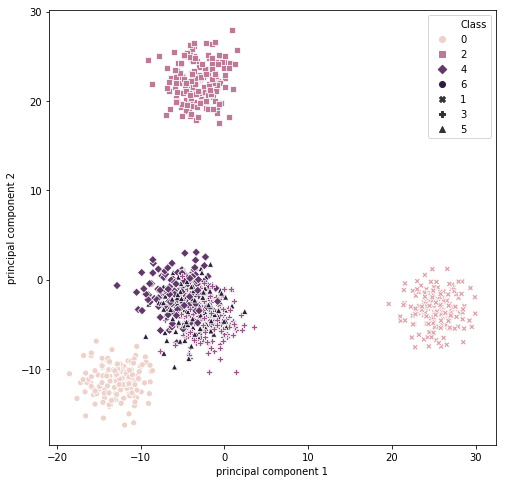

In [52]:
plt.figure(figsize=(8,8))
sb.scatterplot(x="principal component 1",y="principal component 2",data=finalDf,hue="Class",style='Class')
plt.show()

Nhận xét: Dựa vào thuộc tính explained_variance_ratio_ được tính ở trên thì ta thấy rằng sau khi giảm chiều xuống còn k=2, ta còn giữ lại được khoảng 65% của phương sai (hay giữ lại khoảng 65% thông tin liên quan đến dữ liệu gốc). 